In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Add Methods notebook to this notebook
%run Methods.ipynb

Methods.ipynb:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "execution_count": 77,


In [3]:
# Read in data files

entGreedyDist = csv2list("ent2dist")
entDijkstraDist = csv2list("ent3dist")
# entRandDistDivided = csv2list("entDistNewDivided")
entRandDist = csv2list("entDistNew")
entRandBoundaryDist = csv2list("entDistBoundary")
entRandBoundary5Dist = csv2list("entDistBoundary5")

In [5]:
# Random algorithm entropy values needs to be divided by 100

entRandDistList = []

for i in entRandDist:
    entRandDistList.append(i/100)

In [6]:
# Random boundary algorithm entropy values needs to be divided by 100

entRandBoundaryDistList = []

for i in entRandBoundaryDist:
    entRandBoundaryDistList.append(i/100)

In [7]:
# Random boundary 5 algorithm entropy values needs to be divided by 100

entRandBoundaryDist5List = []

for i in entRandBoundary5Dist:
    entRandBoundaryDist5List.append(i/100)

In [8]:
# Pair entropy values to paths

greedy = getList(entGreedyDist)
dijkstra = getList(entDijkstraDist)
rand = getList(entRandDistList)
randBoundary = getList(entRandBoundaryDistList)
randBoundary5 = getList(entRandBoundaryDist5List)

# Calculate the difference between shortest path algorith entropy and greedy algortihm entropy for the same starting and endpont

sum = []
for i in range(len(entGreedyDist)):
    sum.append(entDijkstraDist[i]-entGreedyDist[i])
diff = getList(sum)
diff = sorted(diff, key=lambda x: x[0])

In [9]:
# Calculate average entropy values for each routing tables

greedy_avg = avgEntropy(greedy, 83)
dijkstra_avg = avgEntropy(dijkstra, 83)
rand_avg = avgEntropy(rand, 83)
randBoundary_avg = avgEntropy(randBoundary, 83)
randBoundary5_avg = avgEntropy(randBoundary5, 83)

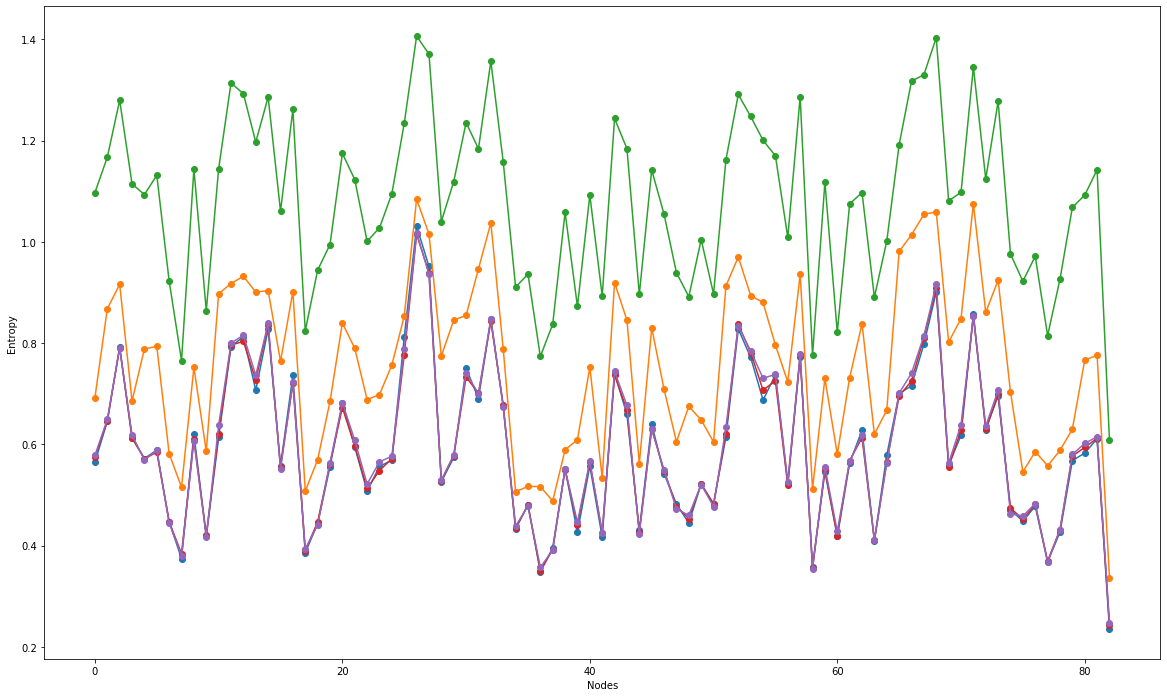

In [11]:
x_axes = [*range(0, 83, 1)]

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(12)

# naming the x axis
plt.xlabel('Nodes')
# naming the y axis
plt.ylabel('Entropy')

# Blue
plt.plot(x_axes, greedy_avg, marker='o')
# Orange
plt.plot(x_axes, dijkstra_avg, marker='o')
# Green
plt.plot(x_axes, rand_avg, marker='o')
# Red
plt.plot(x_axes, randBoundary_avg, marker='o')
# Purple
plt.plot(x_axes, randBoundary5_avg, marker='o')
plt.show()

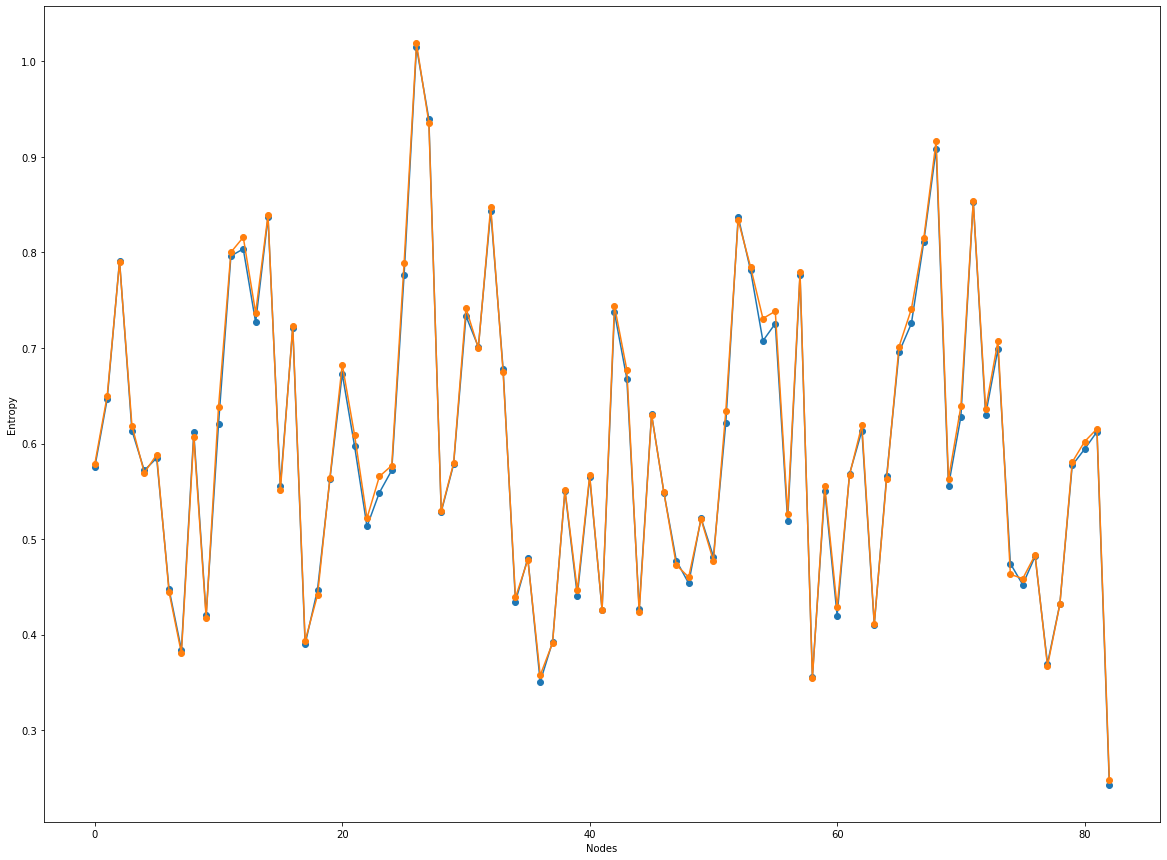

In [14]:
# Plot random boundary algorithms

x_axes = [*range(0, 83, 1)]

# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(15)

# naming the x axis
plt.xlabel('Nodes')
# naming the y axis
plt.ylabel('Entropy')

# Blue
plt.plot(x_axes, randBoundary_avg, marker='o')
# Orange
plt.plot(x_axes, randBoundary5_avg, marker='o')
plt.show()

In [16]:
diffGreedyShortest = []

for i in range(83):
     diffGreedyShortest.append(greedy_avg[i]-dijkstra_avg[i])

avgDiff = 0
for i in diffGreedyShortest:
    avgDiff += i
    
avgDiff = avgDiff/83

# Shortest algorithm average entropy is greater with 0.162..
avgDiff

-0.16216248737129785